# **Analysis Report: Car Price Prediction Model Using XGBoost**

## **1. Objective**
The goal of this project was to build a machine learning model capable of predicting the price of used cars based on various features. These features include the car’s year of manufacture, present price, mileage, fuel type, transmission type, and other characteristics. The model uses historical data to predict the selling price of a car.

## **2. Dataset Overview**
The dataset contains information about 299 used cars, with the following features:

- **Car_Name**: The name of the car
- **Year**: The year of manufacture
- **Selling_Price**: The price at which the car was sold (target variable)
- **Present_Price**: The current market price
- **Driven_kms**: The distance driven by the car (in kilometers)
- **Fuel_Type**: Type of fuel (Diesel, Petrol, etc.)
- **Selling_type**: Whether the selling type is 'Individual' or 'Dealer'
- **Transmission**: Whether the car has a manual or automatic transmission
- **Owner**: The number of previous owners

The dataset is processed, and categorical variables (such as `Fuel_Type`, `Transmission`, `Selling_type`) are one-hot encoded.

## **3. Data Preprocessing**
Before building the model, several preprocessing steps were performed:

- **Feature Engineering**: The `Year` feature was converted to `Car_Age` by subtracting the year of manufacture from the current year. This makes the feature more meaningful for predicting the car's price.
- **One-Hot Encoding**: Categorical features like `Fuel_Type`, `Selling_type`, and `Transmission` were one-hot encoded, transforming them into binary columns.
- **Scaling**: Continuous numerical features (such as `Driven_kms`, `Present_Price`) were scaled to ensure they are on a similar range to avoid dominance by any specific feature.

## **4. Model Selection**
Four regression models were initially chosen to evaluate their performance on the dataset:

1. **Linear Regression**: A simple regression model that assumes a linear relationship between features and the target variable.
2. **Random Forest Regressor**: An ensemble method that builds multiple decision trees and averages their outputs.
3. **Support Vector Regressor (SVR)**: A model that aims to fit the data within a certain margin and penalizes outliers.
4. **XGBoost Regressor**: An optimized gradient boosting algorithm known for its high performance on structured data.

## **5. Hyperparameter Tuning with GridSearchCV**
Hyperparameter tuning was performed using **GridSearchCV** to identify the best hyperparameters for the XGBoost model. The following parameters were optimized:

- **Learning rate**: Controls how much to change the model with each iteration.
- **Max depth**: The maximum depth of a tree; it helps control the model's complexity.
- **Number of estimators**: The number of trees in the model.

The best parameters identified were:

- **Learning rate**: 0.3
- **Max depth**: 3
- **Number of estimators**: 150

These parameters provided the best performance according to the **R² score** and **mean squared error (MSE)**.

## **6. Model Evaluation**
After training with the optimal hyperparameters, the models were evaluated on the test dataset. The evaluation metrics used were:

- **R² Score**: A measure of how well the model's predictions match the actual values. An R² score close to 1 indicates a good fit.
- **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values. A lower MSE indicates better accuracy.

The following results were obtained:

| Model                     | R² Score   | MSE    |
|---------------------------|------------|--------|
| **Linear Regression**      | 0.7527     | 6.3731 |
| **Random Forest**          | 0.5104     | 12.618 |
| **Support Vector Regressor** | -0.0989    | 28.324 |
| **XGBoost (Optimized)**    | 0.8763     | 5.3225 |

From the comparison, **XGBoost** with the optimal hyperparameters significantly outperforms the other models, achieving the highest **R² score** and the lowest **MSE**.

## **7. Model Insights**
- The **XGBoost** model has the highest predictive accuracy, indicating that it is the best suited for this problem.
- Feature importance was analyzed using SHAP (SHapley Additive exPlanations). Key features influencing the car price prediction include:
  - **Present_Price**: A higher present price leads to a higher predicted selling price.
  - **Year**: Newer cars tend to have higher selling prices.
  - **Driven_kms**: Cars with lower kilometers driven tend to fetch higher prices.
  - **Fuel Type**: Diesel and Petrol have distinct impacts on the price, with Diesel generally showing a higher influence.
  - **Transmission**: Manual transmission cars slightly reduce the price compared to automatic ones.

## **8. Explainable AI (XAI)**

### **8.1 Overview of Explainable AI (XAI)**
Explainable AI (XAI) is a crucial component in the responsible deployment of machine learning models, especially for high-stakes applications like pricing predictions. XAI seeks to make the decision-making process of complex models more transparent, interpretable, and understandable to humans. In this project, **XGBoost** is used for car price prediction, and XAI techniques are employed to explain the model's predictions.

### **8.2 SHAP Analysis**
SHAP values were used to explain the predictions made by the **XGBoost** model. SHAP (SHapley Additive exPlanations) values provide insights into how each feature contributes to a particular prediction. The two primary types of SHAP plots used are:

- **SHAP Dependence Plots**: These plots show the relationship between a feature and the SHAP values. They help in understanding how changes in a feature affect the model's prediction. For example, the dependence plot for **Present_Price** shows that higher present prices lead to higher predicted prices for the car.
  
- **SHAP Force Plots**: These provide a visualization of how different features push the model’s output either higher or lower. The force plot demonstrates how much each feature contributes positively or negatively to the prediction of a specific car's price.

#### **Key Insights from XAI:**
1. **Present_Price**: This feature has the highest positive impact on the predicted car price. Cars with higher present prices are likely to be predicted with higher selling prices, as shown by the SHAP force plot.
2. **Year**: Newer cars increase the predicted price. Older cars tend to have a lower predicted price.
3. **Driven_kms**: This feature negatively impacts the predicted price. Cars with fewer kilometers driven are predicted to have higher prices.
4. **Fuel Type and Transmission**: These categorical variables also influence the price, with Diesel fuel and automatic transmission having a higher contribution to the price compared to Petrol fuel and manual transmission.

### **8.3 Impact of XAI**
The use of SHAP for model interpretation ensures that the predictions of the XGBoost model are transparent and understandable. This is crucial for stakeholders who need to trust the model's decision-making process, such as car sellers or buyers, regulatory bodies, or data scientists working to improve the model.

## **9. Next Steps**
With the optimized XGBoost model yielding strong performance and providing interpretable insights via XAI, the next steps for the project are:

1. **Model Deployment**: The trained model can be deployed as a web service (e.g., using Flask) to allow users to input car features and receive predictions.
2. **Model Improvements**: If more data is available, further tuning of the model and adding more features (such as car condition or brand value) could further improve the prediction accuracy.
3. **Business Use**: The model can be integrated into a used car price prediction application or a recommendation engine for car buyers and sellers.
4. **Model Interpretability for Business Use**: Using SHAP for business stakeholders can provide explanations behind price predictions, helping them make informed decisions in car pricing.




# Data upload




In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files

# Upload the Kaggle JSON file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatenbouchiba","key":"e5a14e70eb0172a5d482260f92370fc2"}'}

In [3]:
# Move the kaggle.json file to the ~/.kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Replace with your dataset's Kaggle API command
!kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars


Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
License(s): CC0-1.0
  0% 0.00/3.76k [00:00<?, ?B/s]
100% 3.76k/3.76k [00:00<00:00, 3.96MB/s]


In [5]:
# Unzip the dataset
!unzip car-price-predictionused-cars.zip


Archive:  car-price-predictionused-cars.zip
  inflating: car data.csv            


In [7]:
import pandas as pd

# Load the CSV file (update the file name as per the extracted content)
df = pd.read_csv('/content/car data.csv')

# Preview the dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Processing

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null

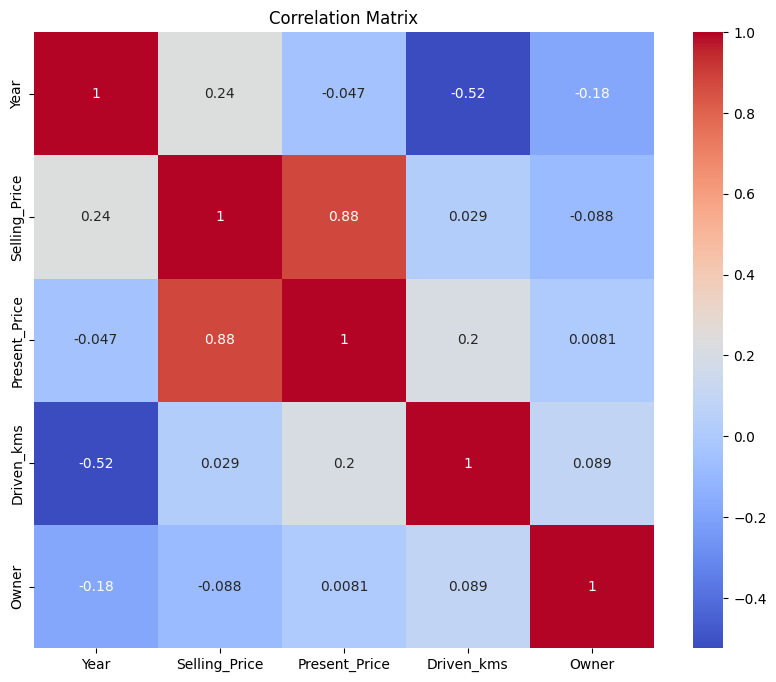

In [9]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Data types
print(df.info())

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numeric columns
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Drop duplicates
df = df.drop_duplicates()

# Fill or drop missing values (example: dropping rows with missing values)
df = df.dropna()

# Check the dataset again
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

# Remove duplicates if any
df = df.drop_duplicates()


Duplicate rows: 0


In [12]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

# Fill or drop missing values (in this case, none were found, but here's how to handle them if needed)
# df = df.fillna(method='ffill')  # Forward fill missing values (if any)
# or
# df = df.dropna()  # Drop rows with missing values


Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [13]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Check the updated dataframe
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


In [14]:
# Drop the 'Car_Name' column as it's irrelevant for prediction
df = df.drop(['Car_Name'], axis=1)

# Check the updated dataframe
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [15]:
# Add a new column 'Car_Age' based on the 'Year'
df['Car_Age'] = 2024 - df['Year']

# Check the updated dataframe
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Car_Age
0,2014,3.35,5.59,27000,0,False,True,False,True,10
1,2013,4.75,9.54,43000,0,True,False,False,True,11
2,2017,7.25,9.85,6900,0,False,True,False,True,7
3,2011,2.85,4.15,5200,0,False,True,False,True,13
4,2014,4.60,6.87,42450,0,True,False,False,True,10


In [16]:
# Final check: Ensure no missing values and check the info
print(df.isnull().sum())  # Check for missing values again
print(df.info())  # Check the data types and the shape of the dataframe


Year                       0
Selling_Price              0
Present_Price              0
Driven_kms                 0
Owner                      0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Individual    0
Transmission_Manual        0
Car_Age                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     299 non-null    int64  
 1   Selling_Price            299 non-null    float64
 2   Present_Price            299 non-null    float64
 3   Driven_kms               299 non-null    int64  
 4   Owner                    299 non-null    int64  
 5   Fuel_Type_Diesel         299 non-null    bool   
 6   Fuel_Type_Petrol         299 non-null    bool   
 7   Selling_type_Individual  299 non-null    bool   
 8   Transmission_Manual      299 non-null    bool   
 9 

#Model Training and Evaluation


In [17]:
# Separate features and target variable
X = df.drop(['Selling_Price'], axis=1)  # Dropping 'Selling_Price' which is the target
y = df['Selling_Price']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (239, 9), Testing set: (60, 9)


In [20]:
# Import necessary models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Dictionary to store results
results = {}

# Loop through each model, train it, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store the results
    results[model_name] = {'R² Score': r2, 'MSE': mse}

    print(f"\n{model_name}:")
    print(f'R² Score: {r2}')
    print(f'Mean Squared Error: {mse}')

# Create a comparison table
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nComparison of Models:\n", results_df)



Linear Regression:
R² Score: 0.7527233824219998
Mean Squared Error: 6.3731251062619645

Random Forest:
R² Score: 0.5104131744349525
Mean Squared Error: 12.61824963583334

Support Vector Regressor:
R² Score: -0.09898473070957814
Mean Squared Error: 28.324421642796228

XGBoost Regressor:
R² Score: 0.7934877464648598
Mean Squared Error: 5.322494462463209

Comparison of Models:
                           R² Score        MSE
Linear Regression         0.752723   6.373125
Random Forest             0.510413  12.618250
Support Vector Regressor -0.098985  28.324422
XGBoost Regressor         0.793488   5.322494


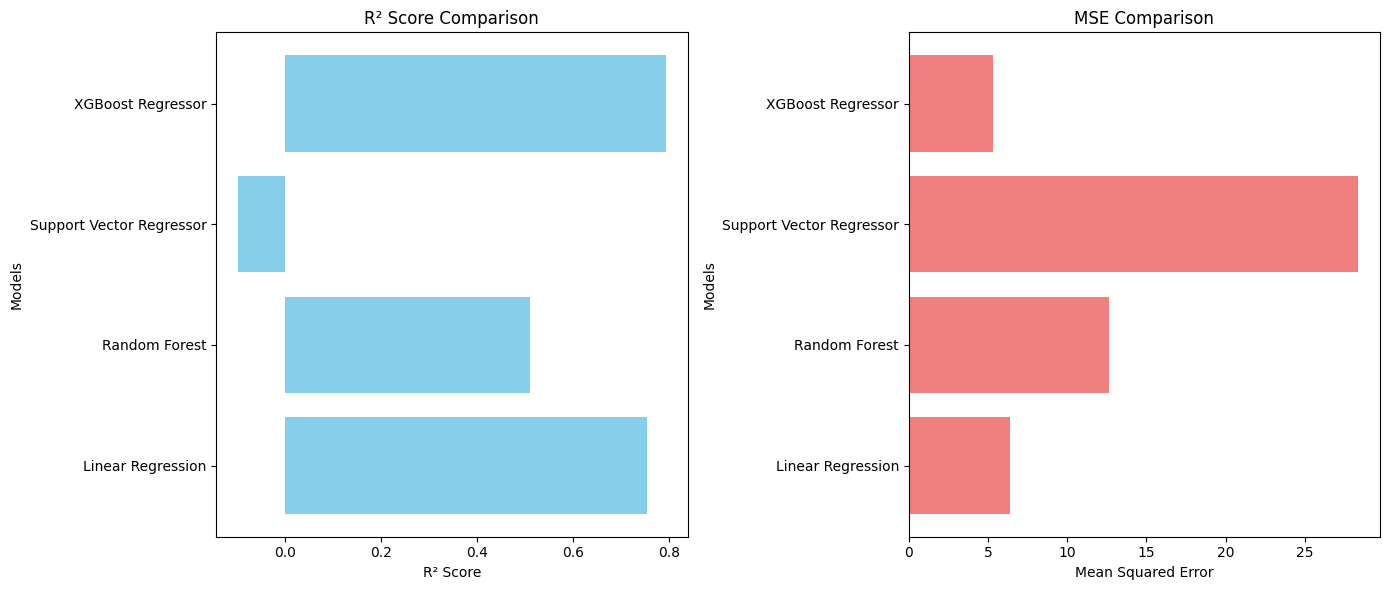

In [21]:
import matplotlib.pyplot as plt

# Create a bar plot to compare the models based on R² score and MSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² Scores
ax1.barh(results_df.index, results_df['R² Score'], color='skyblue')
ax1.set_title('R² Score Comparison')
ax1.set_xlabel('R² Score')
ax1.set_ylabel('Models')

# Plot MSE (Mean Squared Error)
ax2.barh(results_df.index, results_df['MSE'], color='lightcoral')
ax2.set_title('MSE Comparison')
ax2.set_xlabel('Mean Squared Error')
ax2.set_ylabel('Models')

plt.tight_layout()
plt.show()


# SHAP (SHapley Additive exPlanations)

In [22]:
!pip install shap


In [29]:
# Step 1: Data Preparation

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the cleaned data in 'df'

# Features (X) and target (y)
X = df.drop('Selling_Price', axis=1)  # Features
y = df['Selling_Price']  # Target variable

# Ensure that all features are numeric
X = X.astype(float)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 2: Train Your Model

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Predicting the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost Regressor - R²: {r2_xgb}, MSE: {mse_xgb}")


XGBoost Regressor - R²: 0.7934877464648598, MSE: 5.322494462463209


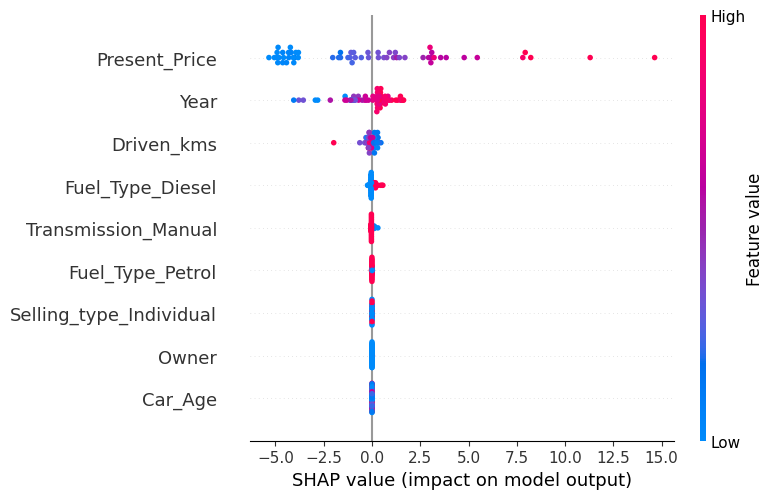

In [31]:
# Step 3: SHAP Implementation

import shap

# Initialize SHAP explainer for the trained XGBoost model
explainer = shap.Explainer(xgb_regressor, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)


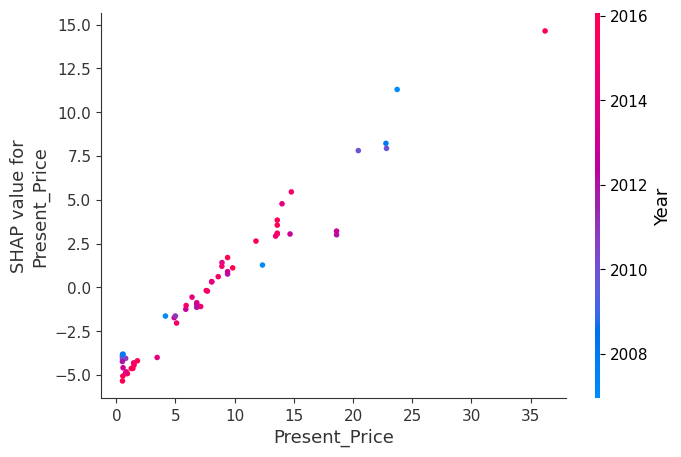

In [33]:
# Extracting the SHAP values and the corresponding feature names
shap_values_array = shap_values.values  # This gives the raw SHAP values
X_test_array = X_test  # This is the test data used to generate the SHAP values

# Visualizing the impact of the 'Present_Price' feature using the corrected approach
shap.dependence_plot('Present_Price', shap_values_array, X_test_array)


In [36]:
# Step 4.2: SHAP Force Plot

# Visualizing the SHAP values for the first prediction in the test set
shap.initjs()  # Required for interactive plots
shap.force_plot(shap_values.base_values[0], shap_values.values[0], X_test.iloc[0])  # Corrected line

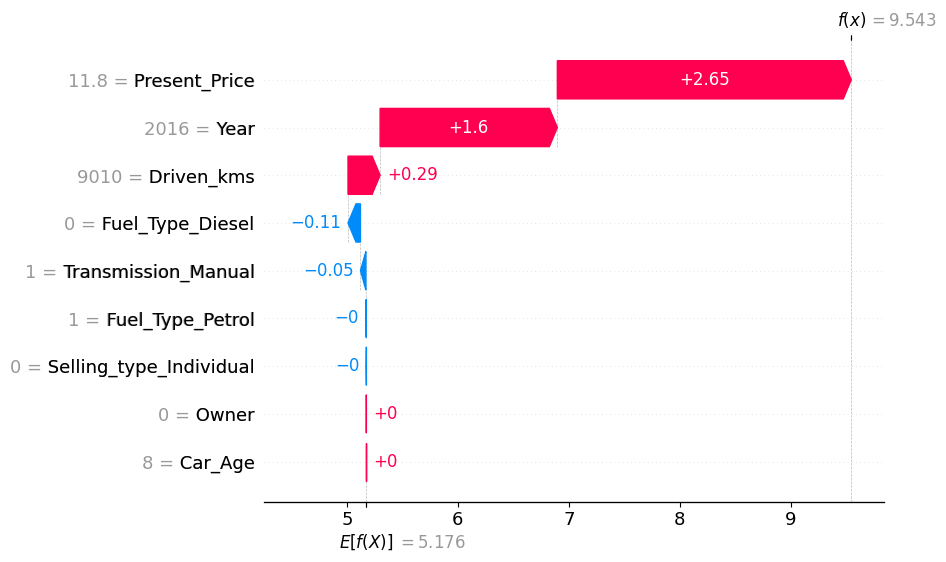

In [37]:
# Step 4.3: SHAP Waterfall Plot

# Visualizing the breakdown for the first prediction
shap.waterfall_plot(shap_values[0])


In [38]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}
Best score: 0.8762945165523289


In [39]:
# Retrain XGBoost model with best hyperparameters
xgb_regressor_optimized = xgb.XGBRegressor(
    learning_rate=0.3,
    max_depth=3,
    n_estimators=150
)

xgb_regressor_optimized.fit(X_train, y_train)

# Predict on test data
y_pred_optimized = xgb_regressor_optimized.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_optimized)
print(f"Optimized MSE: {mse}")

# R² Score
r2 = r2_score(y_test, y_pred_optimized)
print(f"Optimized R² Score: {r2}")


Optimized MSE: 3.451000742230241
Optimized R² Score: 0.86610151588592


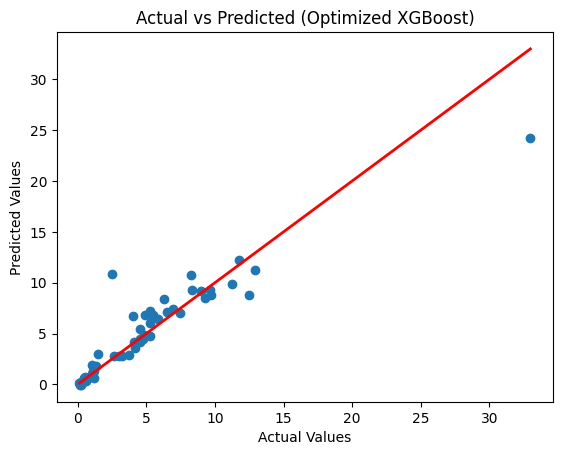

In [40]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_optimized)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Optimized XGBoost)')
plt.show()


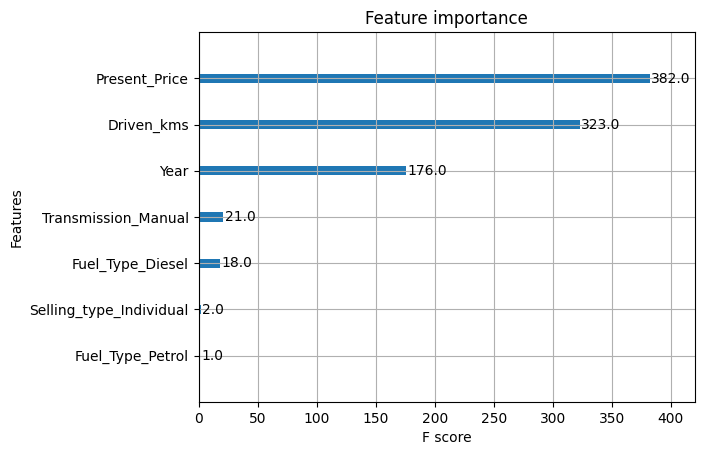

In [41]:
xgb.plot_importance(xgb_regressor_optimized)
plt.show()
